## Import data

In [1]:
from impedance import preprocessing

# Load data from the example EIS result
frequencies, Z = preprocessing.readCSV('./exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

## Define impedance model

In [2]:
from impedance.models.circuits import CustomCircuit

initial_guess = [.01, .01, 100, .01, .05, 100, 1]
circuit = CustomCircuit('R0-p(R1,C1)-p(R2-Wo1,C2)', initial_guess=initial_guess)

## Fit the impedance model to data

In [3]:
circuit.fit(frequencies, Z)

print(circuit)


Circuit string: R0-p(R1,C1)-p(R2-Wo1,C2)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 1.00e-02 [Ohm]
     C1 = 1.00e+02 [F]
     R2 = 1.00e-02 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+02 [sec]
     C2 = 1.00e+00 [F]

Fit parameters:
     R0 = 1.65e-02  (+/- 1.54e-04) [Ohm]
     R1 = 8.68e-03  (+/- 1.91e-04) [Ohm]
     C1 = 3.32e+00  (+/- 1.90e-01) [F]
     R2 = 5.39e-03  (+/- 2.06e-04) [Ohm]
  Wo1_0 = 6.31e-02  (+/- 1.94e-03) [Ohm]
  Wo1_1 = 2.33e+02  (+/- 1.62e+01) [sec]
     C2 = 2.20e-01  (+/- 1.75e-02) [F]



## Analyze/Visualize the results

In [4]:
Z_fit = circuit.predict(frequencies)

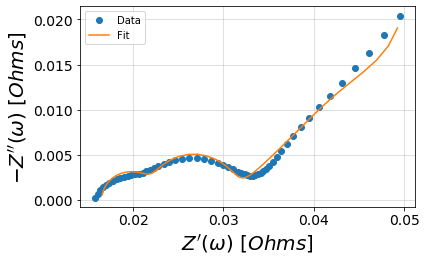

In [5]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(ax, Z, fmt='o')
plot_nyquist(ax, Z_fit, fmt='-')

plt.legend(['Data', 'Fit'])
plt.show()

In [6]:
fig.savefig('example_fit_fig.png', dpi=300, bbox_inches='tight')